# Final Project CSCI 182
## Members: Danny Bowers, Patrick Callahan, Allen Shahshahani

In [10]:
#Import the necessary library to access the Spotify API
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

#attach the Spotify API necessities. 
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id="d7ab2112e221473a8b2a7a88c1aac45e",
                                                           client_secret="fde374bcf24947c1812412a474d3ef94"))

#This will query the top 20 tracks from the artist Milky Chance
results = sp.search(q='milky chance', limit=20)
for idx, track in enumerate(results['tracks']['items']):
    print(idx, track['name'])

0 Stolen Dance
1 Flashed Junk Mind
2 Cocoon
3 Colorado
4 Tainted Love
5 Down By The River
6 Unknown Song
7 Don't Let Me Down
8 Colorado
9 Levitating
10 Fairytale
11 Save Your Tears
12 Daydreaming
13 Sweet Sun
14 Love Again
15 Blossom
16 The Game
17 Fado
18 La Noche De Anoche
19 Firebird


In [11]:
lz_uri = 'spotify:artist:36QJpDe2go2KgaRleHCDTp'

spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(client_id="d7ab2112e221473a8b2a7a88c1aac45e",
                                                           client_secret="fde374bcf24947c1812412a474d3ef94"))
results = spotify.artist_top_tracks(lz_uri)

for track in results['tracks'][:10]:
    print('track    : ' + track['name'])
    print('audio    : ' + track['preview_url'])
    print('cover art: ' + track['album']['images'][0]['url'])
    print()

track    : Stairway to Heaven - Remaster
audio    : https://p.scdn.co/mp3-preview/8226164717312bc411f8635580562d67e191a754?cid=d7ab2112e221473a8b2a7a88c1aac45e
cover art: https://i.scdn.co/image/ab67616d0000b273c8a11e48c91a982d086afc69

track    : Immigrant Song - Remaster
audio    : https://p.scdn.co/mp3-preview/8455599677a13017978dcd3f4b210937f0a16bcb?cid=d7ab2112e221473a8b2a7a88c1aac45e
cover art: https://i.scdn.co/image/ab67616d0000b27390a50cfe99a4c19ff3cbfbdb

track    : Whole Lotta Love - 1990 Remaster
audio    : https://p.scdn.co/mp3-preview/ce11b19a4d2de9976d7626df0717d0073863909c?cid=d7ab2112e221473a8b2a7a88c1aac45e
cover art: https://i.scdn.co/image/ab67616d0000b273fc4f17340773c6c3579fea0d

track    : Black Dog - Remaster
audio    : https://p.scdn.co/mp3-preview/9b76619fd9d563a48d38cc90ca00c3008327b52e?cid=d7ab2112e221473a8b2a7a88c1aac45e
cover art: https://i.scdn.co/image/ab67616d0000b273c8a11e48c91a982d086afc69

track    : Kashmir - Remaster
audio    : https://p.scdn.co/mp3

# Where the Project Begins

In [245]:
import spotipy
import sys
import spotipy.util as util

# Add the tokens necessary to use the Spotify API
username = 'connor19802'
SPOTIPY_CLIENT_ID = 'd7ab2112e221473a8b2a7a88c1aac45e'
SPOTIPY_CLIENT_SECRET = 'fde374bcf24947c1812412a474d3ef94'
SPOTIPY_REDIRECT_URI='http://localhost:8080/callback'

In [191]:
# Authenticate the user and make the scope capable of reading the top values for the authenticated user
scope = 'user-top-read'
token = util.prompt_for_user_token(username, scope, client_id=SPOTIPY_CLIENT_ID,
                           client_secret=SPOTIPY_CLIENT_SECRET,
                           redirect_uri=SPOTIPY_REDIRECT_URI)
sp = spotipy.Spotify(auth=token)

In [192]:
import pandas as pd


top_liked_song_names = sp.current_user_top_tracks(limit=50) #Get the top 50 songs of the user
top_liked_song_id = {}
#create a dictionary of the song names and id's 
for name in top_liked_song_names['items']:
    top_liked_song_id[name['name']] = name['id']

audio_features_list = []
#make a list of the audio features of those top 50 songs
for song, id in top_liked_song_id.items():
    audio_track_info = sp.audio_features(id)
    audio_features_list.append(audio_track_info)


In [193]:
#Add the song names to those dictionaries so we know what songs have which features
for i in audio_features_list:
    for song in top_liked_song_id.keys():
        i[0]['Song_Name'] = song
        del top_liked_song_id[song]
        break
 

50


In [232]:

list_audio_ = []
#clean up the list because it had nested lists with single dictionaries within each nested list. Instead make it one list of dictionaries
for i in audio_features_list:
    for j in i: 
        list_audio_.append(j)

#Create dataframe off those features
df = pd.DataFrame(list_audio_)
#Process which audio data will be necessary and delete the uneseccary data from the datafram
del df['uri']
del df['track_href']
del df['analysis_url']
del df['type']
del df['time_signature']
del df['mode']
df.head()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,Song_Name
0,0.494,0.341,2,-12.501,0.0508,0.66200,0.000571,0.0673,0.3910,171.210,1SqAcHRKodDP1mxvAqkCvU,235416,26
1,0.455,0.525,7,-9.225,0.1490,0.80200,0.000000,0.2260,0.3830,83.237,6vyFAHVKIsp3pdyhlOKMAz,171025,All That and More (Sailboat)
2,0.483,0.486,0,-11.062,0.0434,0.75300,0.004790,0.1340,0.4660,92.048,6255IIBwKySv6RYrOeHfQh,193049,All the Debts I Owe
3,0.443,0.419,7,-7.975,0.0321,0.63300,0.001830,0.4040,0.0719,132.204,3MwHZDGwAR8RjZZBriBqmx,256520,Next to You
4,0.762,0.766,7,-3.955,0.0343,0.00776,0.000070,0.1280,0.4420,130.001,5fwSHlTEWpluwOM0Sxnh5k,287120,Pepas


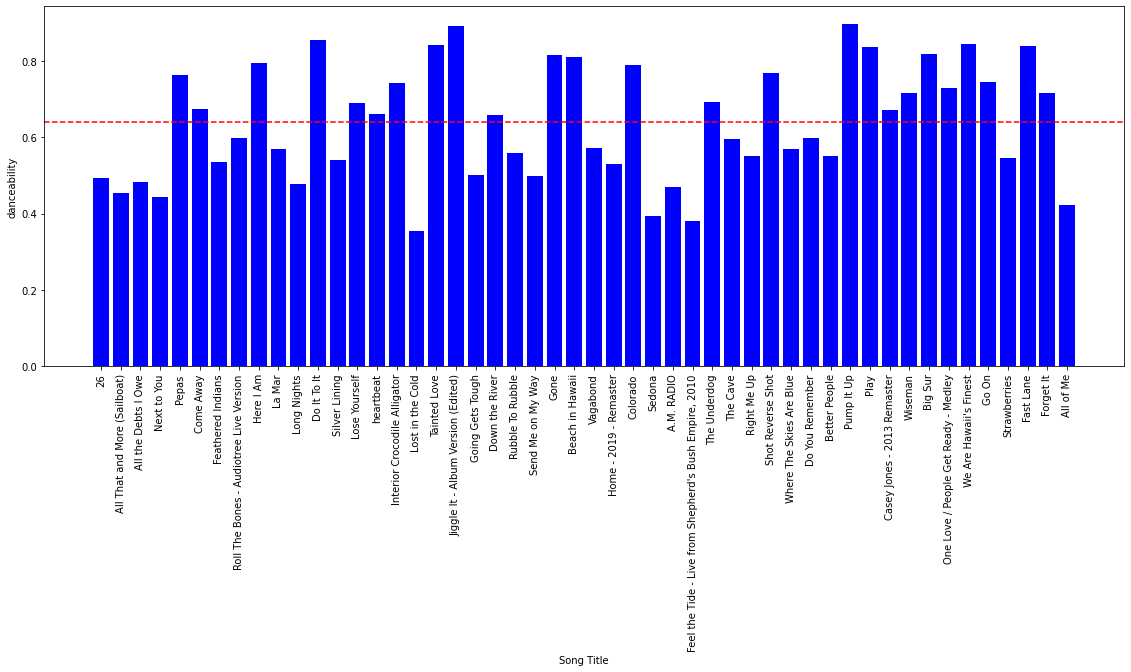

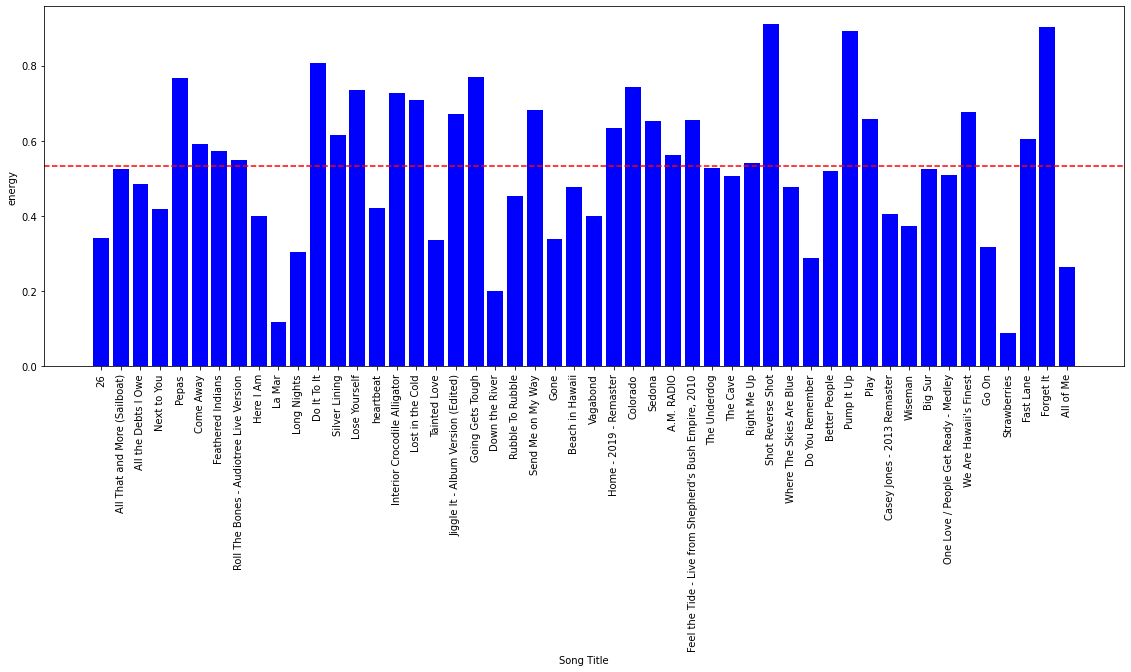

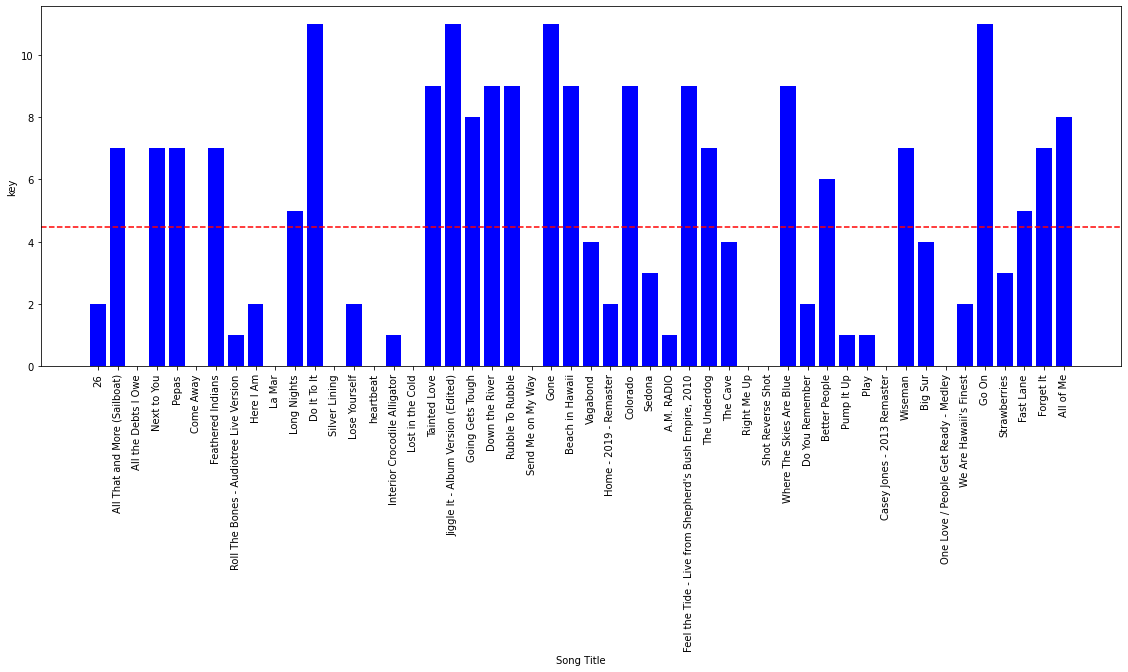

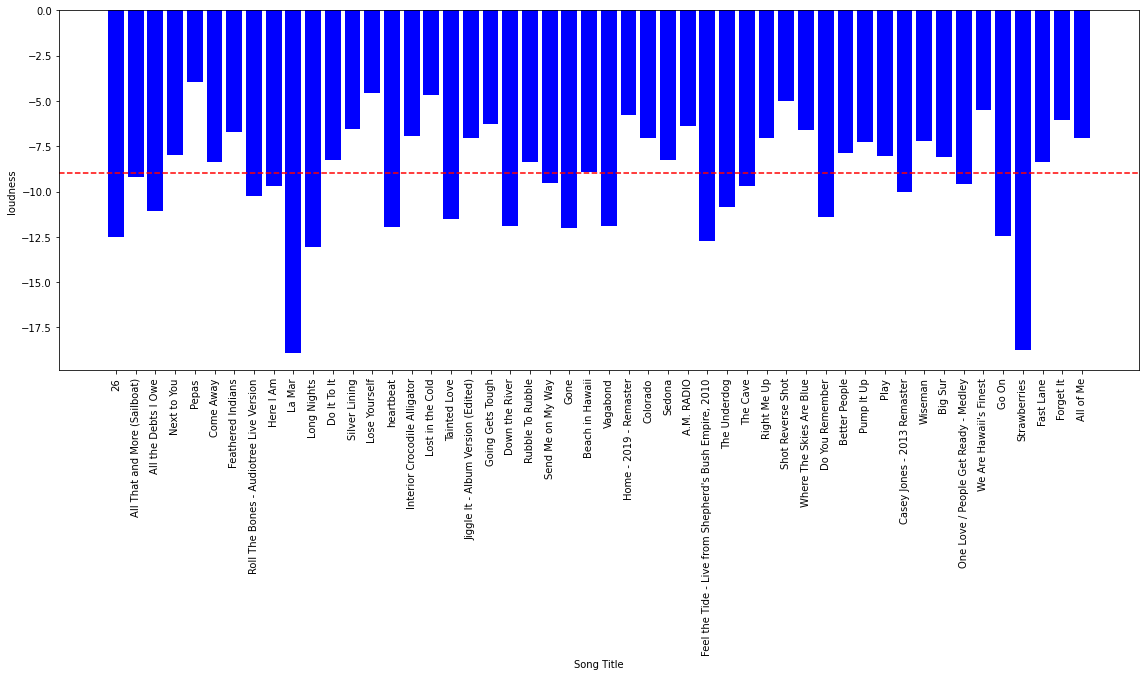

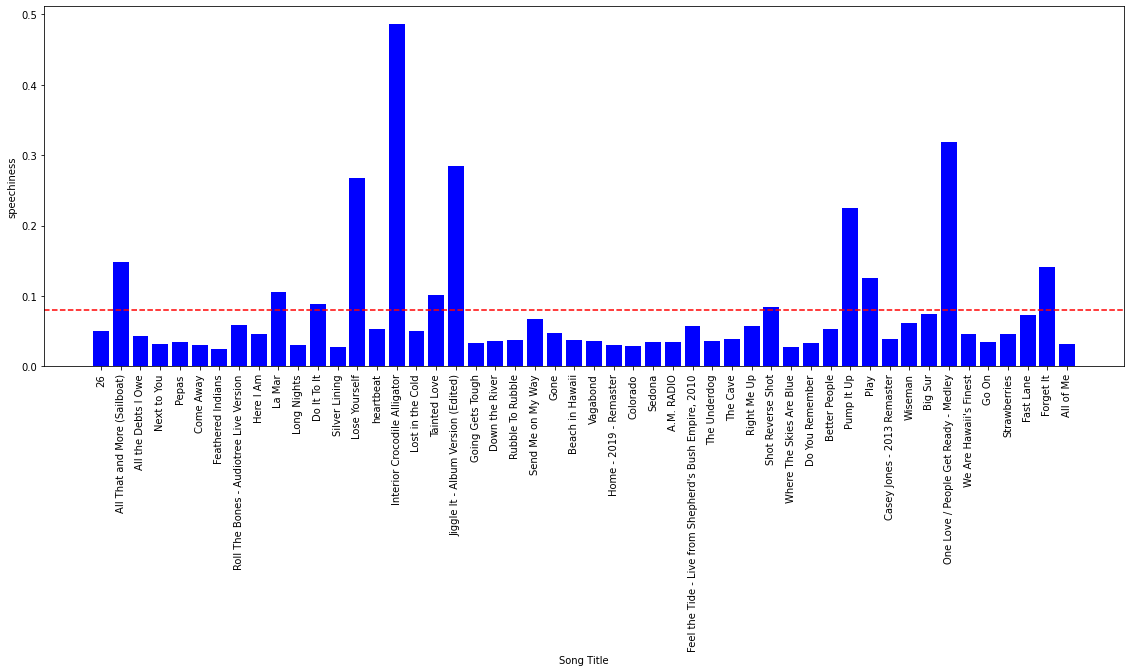

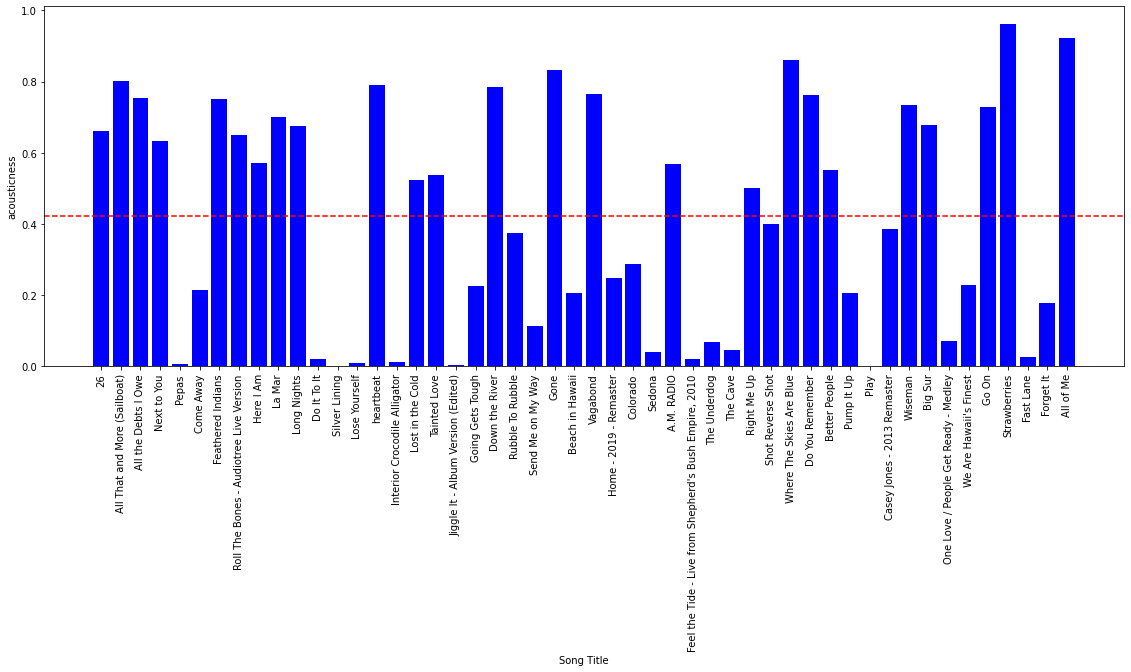

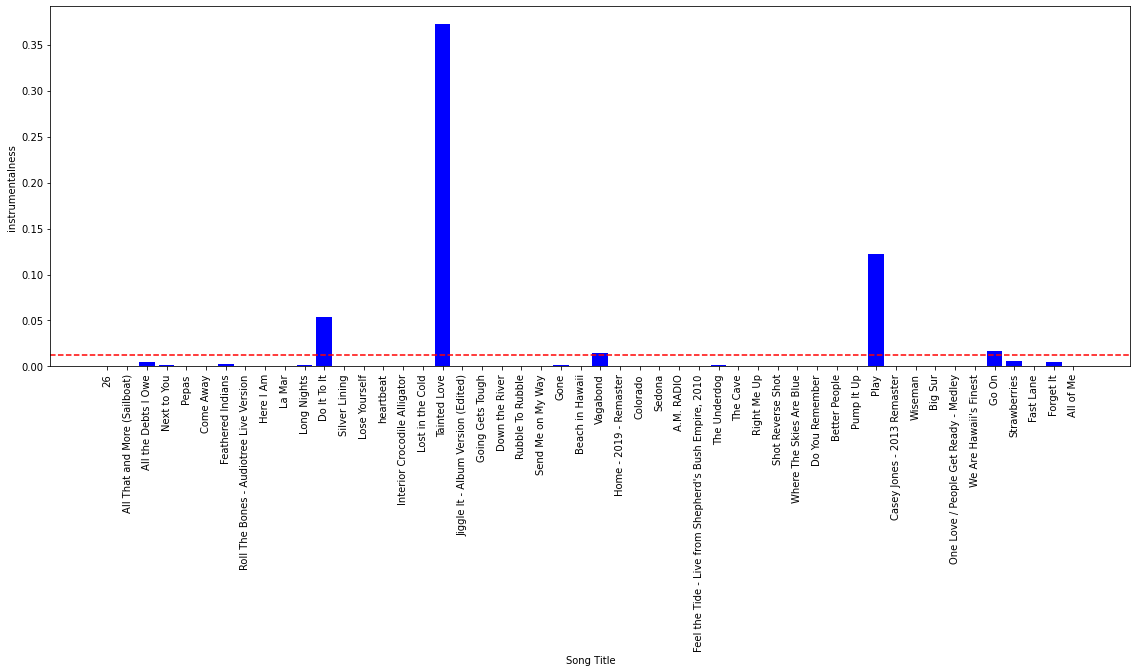

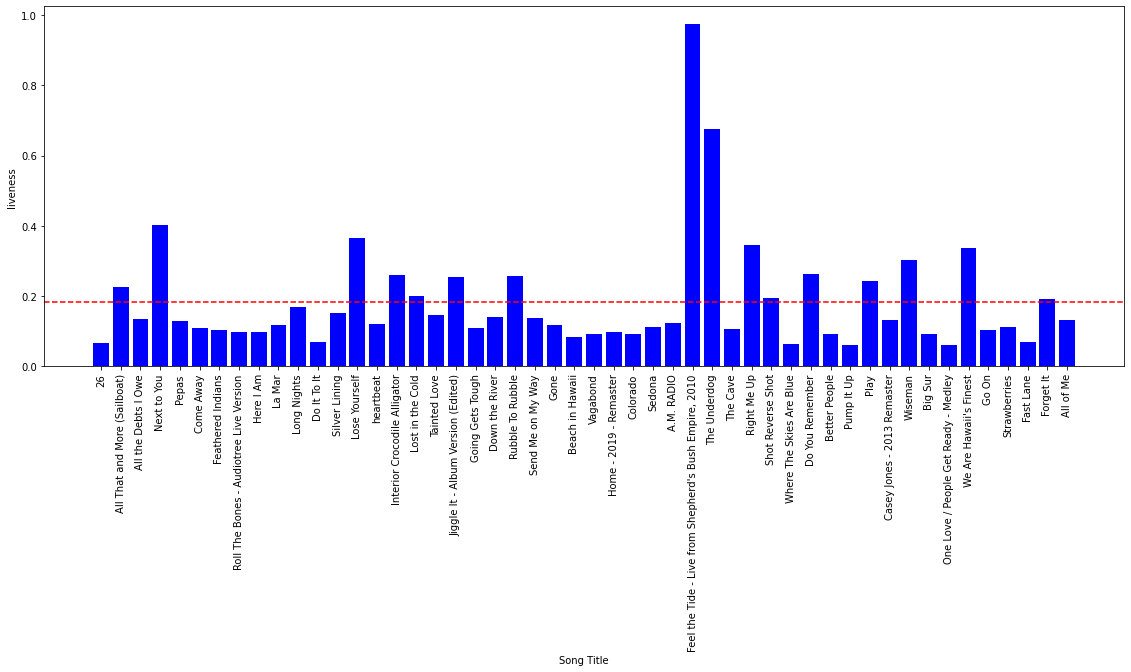

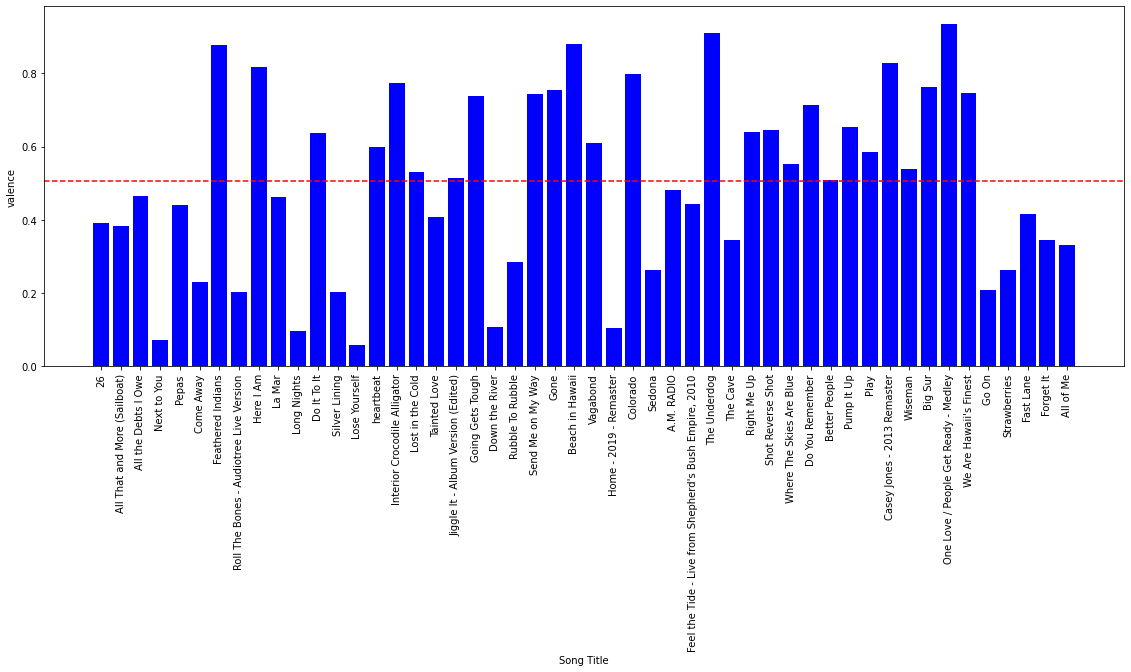

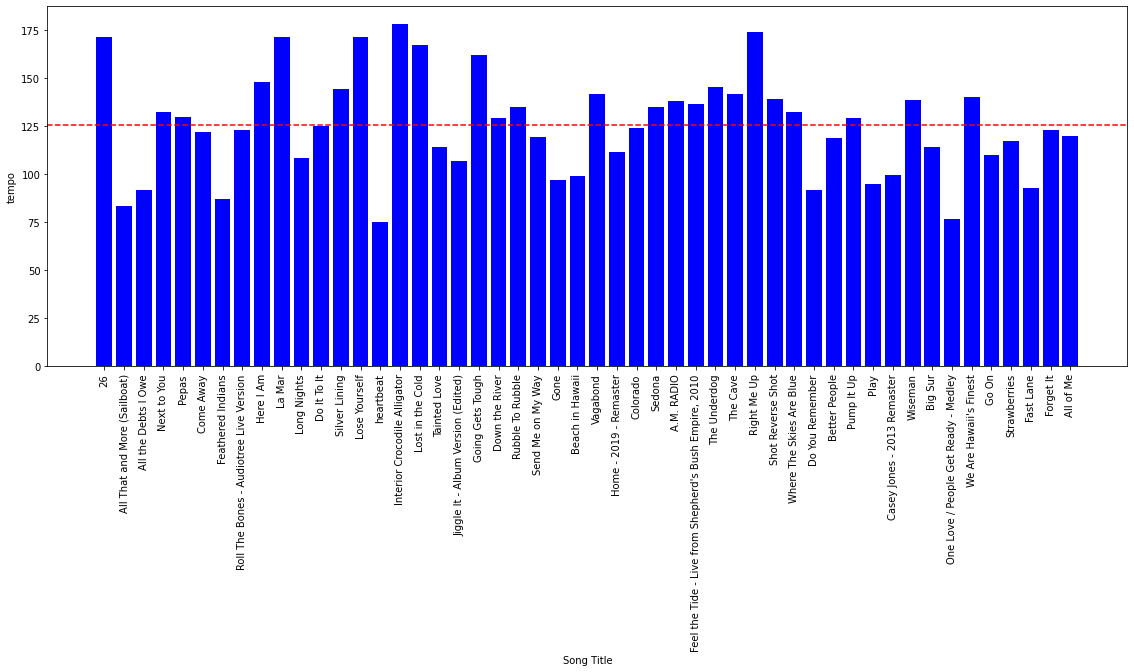

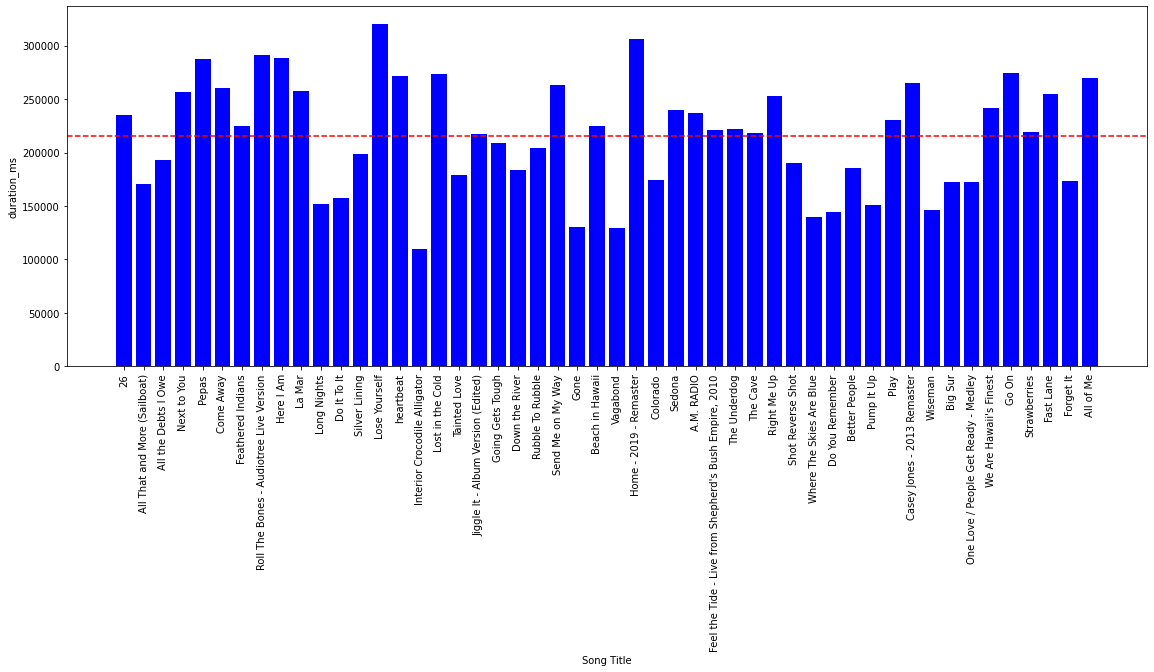


Average of:  danceability  is:  0.63898
Average of:  energy  is:  0.533114
Average of:  key  is:  4.46
Average of:  loudness  is:  -8.981720000000001
Average of:  speechiness  is:  0.079966
Average of:  acousticness  is:  0.42207086
Average of:  instrumentalness  is:  0.0122126958
Average of:  liveness  is:  0.183
Average of:  valence  is:  0.506366
Average of:  tempo  is:  125.5826
Average of:  duration_ms  is:  215890.36


In [246]:
import matplotlib.pyplot as plt
import numpy as np


average_features = {}
#Function that will create a graph for each feature and song name to visualize the data. The function returns the average values for each feature. 
#This will allow us to reference which songs the user may like in the future. Because the average data is based of the top 50 songs the user listens to, 
# we can use the averages to understand which songs the user may also like. 
def makeAudioGraph(av_feats, df):
    for column in df: 
        if column != 'id' and column != 'Song_Name':
            average_y = np.average(df[column])
            fig = plt.figure(figsize=(15, 5))
            ax = fig.add_axes([0,0,1,1])
            title = df['Song_Name']
            feature = df[column]
            ax.bar(title,feature, color='blue')
            ax.set_ylabel(column)
            ax.set_xlabel('Song Title')
            plt.xticks(rotation = 90)
            plt.axhline(y= average_y,color='red', linestyle ='dashed')
            plt.show()
            print()
            av_feats[column] = average_y
            
    return av_feats

final_averages = makeAudioGraph(average_features, df)

for key, value in final_averages.items():
    print('Average of: ',key, ' is: ', value)